In [ ]:
# Name: Lilli Nappi
# CWID: 20006502
# HW05_CART

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [30]:
# Load dataset
df = pd.read_csv('breast-cancer-wisconsin.csv')

# change column label to Benign and Malignant
df['Class'] = df['Class'].map({2: 'Benign', 4: 'Malignant'})

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
df = df.replace(['?'], None)
df['F6'] = pd.to_numeric(df['F6'], errors='coerce')
df['F6'].fillna(df['F6'].mean(),inplace=True)
df['F6'] = df['F6'].astype(int)
df.info()


Empty DataFrame
Columns: [Sample, F1, F2, F3, F4, F5, F6, F7, F8, F9, Class]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sample  699 non-null    int64 
 1   F1      699 non-null    int64 
 2   F2      699 non-null    int64 
 3   F3      699 non-null    int64 
 4   F4      699 non-null    int64 
 5   F5      699 non-null    int64 
 6   F6      699 non-null    int64 
 7   F7      699 non-null    int64 
 8   F8      699 non-null    int64 
 9   F9      699 non-null    int64 
 10  Class   699 non-null    object
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


<ipython-input-30-2e571c52029c>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['F6'].fillna(df['F6'].mean(),inplace=True)


In [31]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sample  699 non-null    int64
 1   F1      699 non-null    int64
 2   F2      699 non-null    int64
 3   F3      699 non-null    int64
 4   F4      699 non-null    int64
 5   F5      699 non-null    int64
 6   F6      699 non-null    int64
 7   F7      699 non-null    int64
 8   F8      699 non-null    int64
 9   F9      699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   699 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


Class_Malignant
False    458
True     241
Name: count, dtype: int64


,Class_Malignant
0,False
1,False
2,False
3,False
4,False


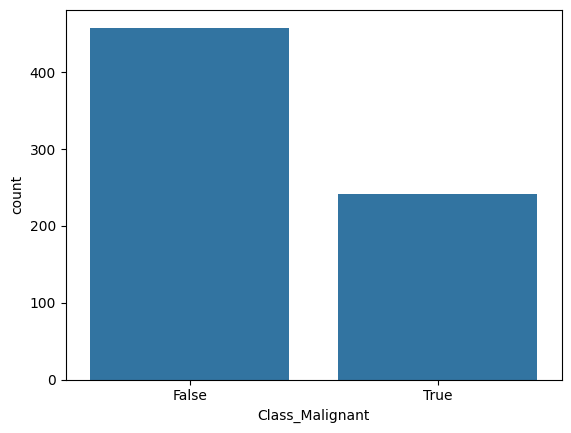

In [32]:
df_obj= pd.get_dummies(df_obj, drop_first=True)
print(df_obj['Class_Malignant'].value_counts())
sns.countplot(data=df_obj, x='Class_Malignant')
df_obj.head()

In [55]:
attr = df_num
target = df_obj['Class_Malignant']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=5)

In [56]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [57]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(target_test,target_pred))
print(classification_report(target_test,target_pred))

[[132   7]
 [  8  63]]
              precision    recall  f1-score   support

       False       0.94      0.95      0.95       139
        True       0.90      0.89      0.89        71

    accuracy                           0.93       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.93      0.93      0.93       210



In [54]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns);